Subway Stations in area:

Borough Hall
Jay St
Dekalb
Atlantic

Using Turnstile data from MTA to get current station usage.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pylab as pl
pl.style.use('fivethirtyeight')
from stackedBarGraph import StackedBarGrapher
SBG = StackedBarGrapher()
import pandas as pd

In [3]:
data = pd.read_csv('turnstile_151017.txt')
data['TURNSTILE'] = data['UNIT'] + data['SCP']

In [4]:
data.columns

Index([u'C/A', u'UNIT', u'SCP', u'STATION', u'LINENAME', u'DIVISION', u'DATE',
       u'TIME', u'DESC', u'ENTRIES',
       u'EXITS                                                               ',
       u'TURNSTILE'],
      dtype='object')

In [5]:
np.unique(data.STATION)

array(['1 AVE', '103 ST', '103 ST-CORONA', '104 ST', '110 ST',
       '110 ST-CATHEDRL', '110 ST-CPN', '111 ST', '116 ST',
       '116 ST-COLUMBIA', '121 ST', '125 ST', '135 ST', '137 ST-CITY COL',
       '138 ST-3 AVE', '138 ST-GR CONC', '14 ST', '14 ST-6 AVE',
       '14 ST-UNION SQ', '145 ST', '148 ST-LENOX', '149 ST-3 AVE',
       '149 ST-GR CONC', '14TH STREET', '15 ST-PROSPECT', '155 ST',
       '157 ST', '161 ST-YANKEE', '163 ST-AMSTERDM', '167 ST',
       '168 ST-BROADWAY', '169 ST', '170 ST', '174 ST', '174-175 ST',
       '175 ST', '176 ST', '18 AVE', '18 ST', '181 ST', '182-183 ST',
       '183 ST', '190 ST', '191 ST', '2 AVE', '20 AVE', '207 ST', '21 ST',
       '215 ST', '219 ST', '22 AVE-BAY PKY', '225 ST', '23 ST',
       '23 ST-5 AVE', '23 ST-6 AVE', '231 ST', '233 ST', '238 ST',
       '242 ST', '25 AVE', '25 ST', '28 ST', '28 ST-BROADWAY', '3 AVE',
       '33 ST', '33 ST/RAWSON ST', '34 ST-HERALD SQ', '34 ST-HUDSON YD',
       '34 ST-PENN STA', '36 ST', '4 AVE', '40 S

In [6]:
stations = {
    'JAY ST-METROTEC': [], 
    'DEKALB AVE': [], 
    'BOROUGH HALL/CT': [],
    'BARCLAYS CENTER': [],
#    'HOYT ST': [], 
    'HOYT/SCHERMER': []
}

times = [
    '00:00:00',
    '04:00:00',
    '08:00:00',
    '12:00:00',
    '16:00:00',
    '20:00:00',
]
#gb = data.groupby(['STATION', 'SCP', 'TIME'])

In [7]:
for k in stations:
    stations[k] = {
        'entries': dict([(t,0) for t in times]),
        'exits': dict([(t,0) for t in times])
    }
    for t in np.unique(data[data.STATION==k]['TURNSTILE']):
        d = data[(data.STATION==k) & (data.TURNSTILE==t)]
        for time in times:
            stations[k]['entries'][time] += d['ENTRIES'].diff()[d['TIME']==time].mean()
            stations[k]['exits'][time] += d['EXITS                                                               '].diff()[d['TIME']==time].mean()
            #print k, t, time, d['EXITS                                                               '][d['TIME']==time]
        

In [8]:
print stations

{'HOYT/SCHERMER': {'exits': {'04:00:00': 158.71428571428572, '08:00:00': 725.8571428571429, '12:00:00': 2372.0, '00:00:00': 672.1666666666666, '20:00:00': 1856.142857142857, '16:00:00': 1822.0}, 'entries': {'04:00:00': 151.85714285714283, '08:00:00': 347.2857142857143, '12:00:00': 1583.4285714285716, '00:00:00': 1049.6666666666667, '20:00:00': 3203.1428571428573, '16:00:00': 2389.142857142857}}, 'HOYT ST': {'exits': {'04:00:00': 62.571428571428584, '08:00:00': 577.5714285714286, '12:00:00': 1893.1428571428573, '00:00:00': 414.33333333333337, '20:00:00': 1303.4285714285716, '16:00:00': 1449.5714285714284}, 'entries': {'04:00:00': 69.57142857142857, '08:00:00': 272.14285714285717, '12:00:00': 1036.4285714285713, '00:00:00': 676.8333333333333, '20:00:00': 2593.142857142857, '16:00:00': 1869.4285714285718}}, 'BARCLAYS CENTER': {'exits': {'04:00:00': 812.4285714285713, '08:00:00': 2727.8571428571427, '12:00:00': 7039.42857142857, '00:00:00': 3966.6666666666665, '20:00:00': 14634.99999999999

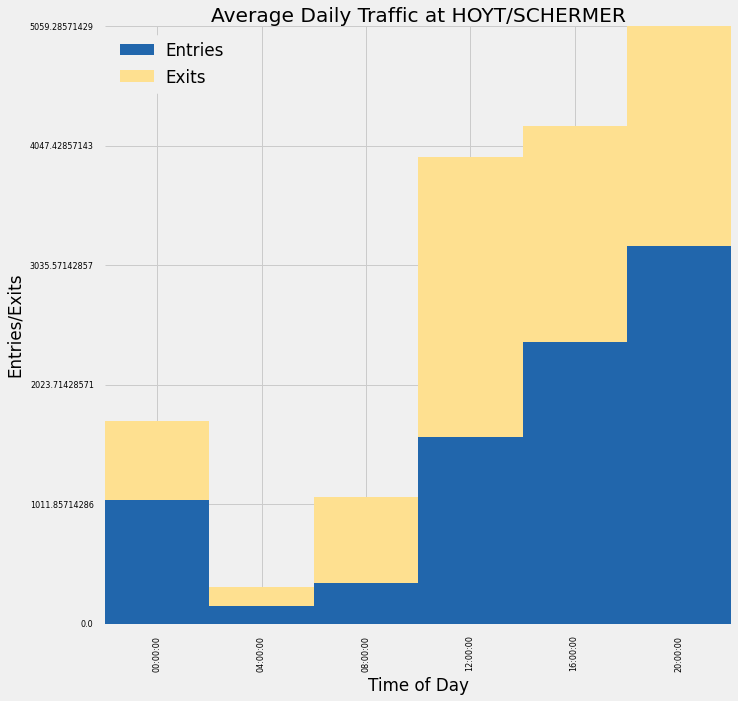

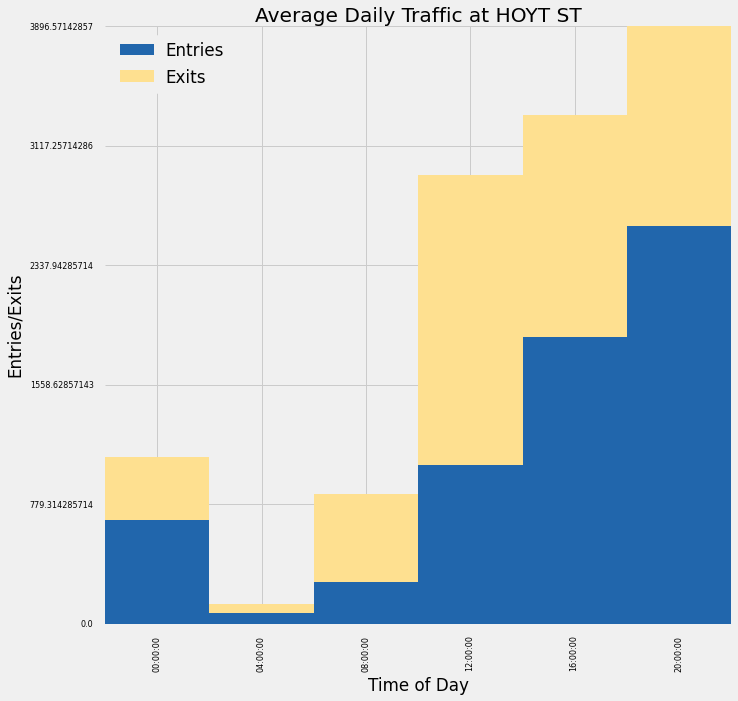

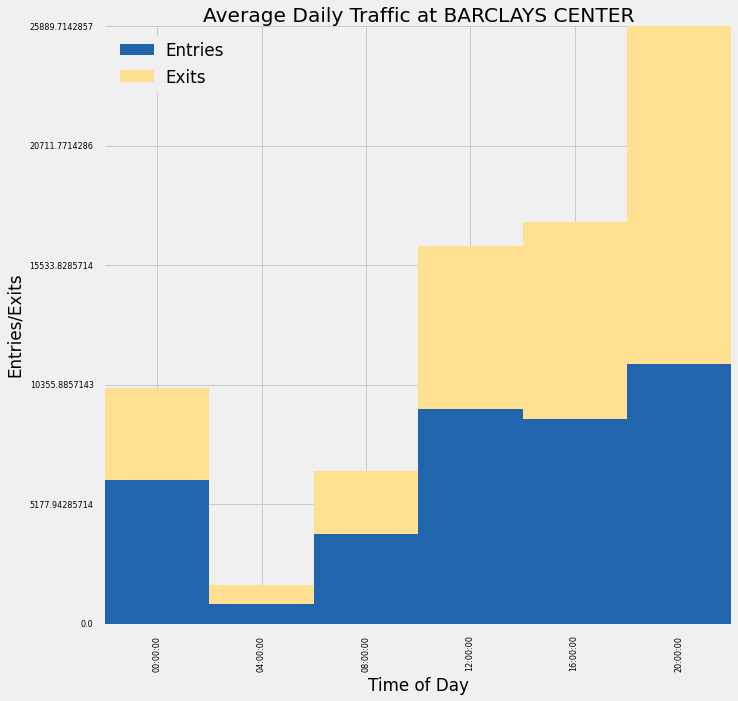

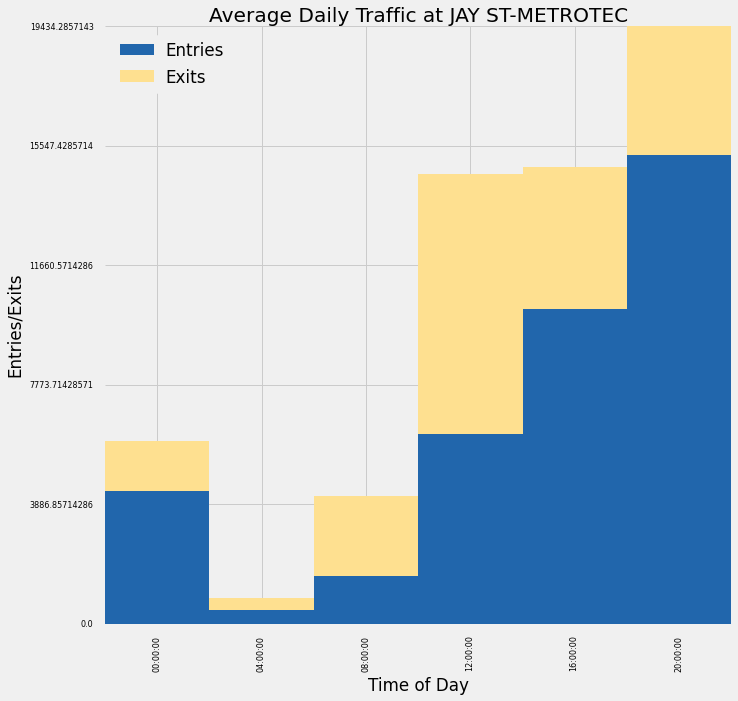

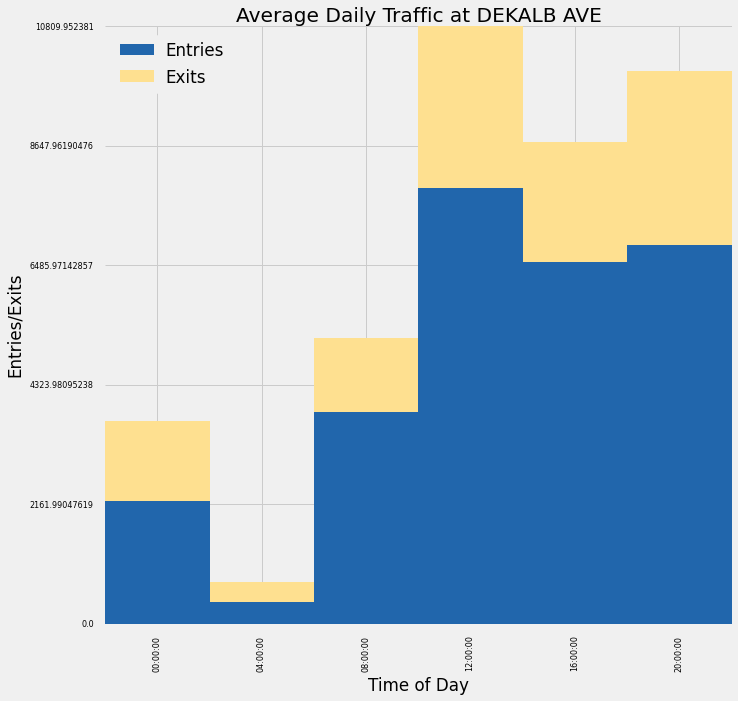

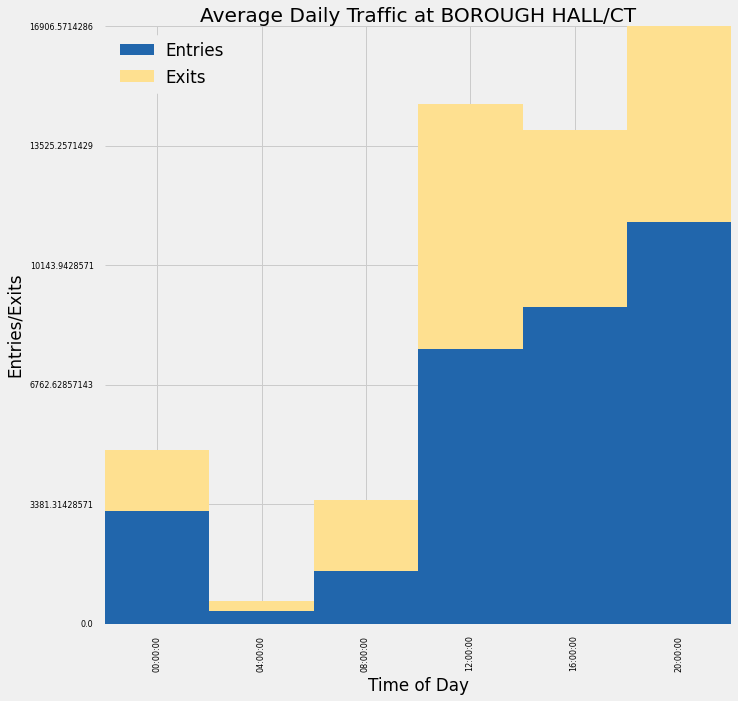

In [9]:
d_colors = ['#2166ac', '#fee090', '#fdbb84', '#fc8d59', '#e34a33', '#b30000', '#777777']

for station in stations:
    figure, ax = pl.subplots(figsize=(10,10))
    d = [
        [stations[station]['entries'][t], stations[station]['exits'][t]] for t in times
    ]

    bars = SBG.stackedBarPlot(ax, d, d_colors, xLabels=times)
    ax.legend(bars, ['Entries', 'Exits'], loc='upper left')
    ax.set_title('Average Daily Traffic at %s' % station)
    ax.set_ylabel('Entries/Exits')
    ax.set_xlabel('Time of Day')

In [13]:
for station in stations:
    total = 0
    for e in ['entries', 'exits']:
        for k,v in stations[station][e].iteritems():
            #print i
            total += v
    print station, total

HOYT/SCHERMER 16331.4047619
HOYT ST 12218.1666667
BARCLAYS CENTER 78121.1190476
JAY ST-METROTEC 59861.8095238
DEKALB AVE 39138.0714286
BOROUGH HALL/CT 54622.2619048
